Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_theme(style = 'darkgrid',palette = 'rainbow')

In [2]:
df = pd.read_csv('wine.csv')
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Type,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoids,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
sc = StandardScaler()
x = sc.fit_transform(df)
x

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [7]:
cov = np.cov(x.T)
cov

array([[ 1.00564972, -0.3300763 ,  0.44024952, -0.04992369,  0.52078487,
        -0.21036119, -0.72322641, -0.85228566,  0.49187249, -0.50194977,
         0.26716852, -0.62085717, -0.79268286, -0.63729711],
       [-0.3300763 ,  1.00564972,  0.09493026,  0.21273976, -0.31198788,
         0.27232816,  0.29073446,  0.23815287, -0.15681042,  0.13747022,
         0.549451  , -0.07215255,  0.07275191,  0.64735687],
       [ 0.44024952,  0.09493026,  1.00564972,  0.16497228,  0.29013035,
        -0.05488343, -0.3370606 , -0.41332866,  0.29463237, -0.22199334,
         0.25039204, -0.56446685, -0.37079354, -0.19309537],
       [-0.04992369,  0.21273976,  0.16497228,  1.00564972,  0.44587209,
         0.28820583,  0.12970824,  0.11572743,  0.1872826 ,  0.00970647,
         0.2603499 , -0.07508874,  0.00393333,  0.22488969],
       [ 0.52078487, -0.31198788,  0.29013035,  0.44587209,  1.00564972,
        -0.0838039 , -0.32292752, -0.353355  ,  0.36396647, -0.19844168,
         0.01883781, -0.27

In [8]:
values,vectors = np.linalg.eig(cov)

In [9]:
values

array([5.56722458, 2.51118402, 1.45424413, 0.9331603 , 0.88246016,
       0.67657935, 0.55692777, 0.05813894, 0.13029618, 0.35201176,
       0.16975037, 0.29620602, 0.26378805, 0.2271244 ])

In [10]:
vectors

array([[-0.39366953, -0.00569041, -0.00121795, -0.12246373, -0.15758395,
         0.20033864,  0.05938234, -0.66904528,  0.49224318,  0.07179553,
         0.01575769, -0.16236882, -0.19899373,  0.01444169],
       [ 0.13632501, -0.48416087,  0.20740081,  0.08191848,  0.25089415,
        -0.13517139,  0.09269887, -0.09062605,  0.05610645,  0.42154435,
        -0.26411262, -0.45019071,  0.31127983, -0.22154641],
       [-0.22267638, -0.22359095, -0.08879606, -0.46988824,  0.18860015,
        -0.59841948, -0.3743698 ,  0.02522531, -0.06675544,  0.08757556,
         0.1192121 , -0.00602569, -0.32592413,  0.06839251],
       [ 0.00225793, -0.31585588, -0.62610236,  0.24984122,  0.0935236 ,
        -0.10799983,  0.16708856,  0.00163582,  0.19201787, -0.17208034,
        -0.04502305,  0.26249446, -0.12452347, -0.49452428],
       [-0.22429849,  0.01161574, -0.6119896 , -0.07199322, -0.0465675 ,
         0.08811224,  0.26872469,  0.09536107, -0.20007784,  0.41324857,
        -0.06131271, -0.11

In [12]:
pc1 = x@vectors[:,0]
pc1

array([ 3.5229339 ,  2.52885806,  2.78502898,  3.92258841,  1.40751111,
        3.28812981,  2.75057754,  2.39286652,  2.79525633,  3.00559666,
        3.67868855,  2.10963477,  2.43845636,  3.67349453,  4.44157575,
        2.60892387,  2.47542846,  2.22623243,  3.74226929,  2.3944115 ,
        3.33656895,  1.48140399,  2.82806867,  2.00771405,  2.11463604,
        1.39753751,  2.13348803,  1.62970383,  2.50760753,  2.55948318,
        2.77244452,  2.93513374,  1.99124842,  2.24570987,  1.78698628,
        2.22763867,  1.76802847,  1.52317798,  1.87236494,  2.79711434,
        2.84093569,  1.1055721 ,  3.30689482,  0.90479842,  2.39683569,
        1.53781235,  2.99121644,  3.05931631,  2.31877146,  2.95947229,
        3.4121813 ,  3.11637827,  3.70021113,  2.53754828,  2.44478924,
        2.72281451,  2.98531677,  2.4881469 ,  3.35128665, -0.87492504,
       -1.41466076, -1.71387916,  0.01229686,  1.83310122, -0.57453595,
        0.79147116,  2.02003148,  0.14328098, -0.75150766,  1.74

In [13]:
pc2 = x@vectors[:,1]
pc2

array([-1.45309844,  0.33001925, -1.03693595, -2.76821026, -0.86777309,
       -2.13017513, -1.17916999, -1.61128232, -0.92317952, -0.79628417,
       -1.31252342, -0.61298199, -0.67852331, -1.14012136, -2.11031917,
       -1.66641801, -2.33089672, -1.63359016, -2.52840527, -1.06452946,
       -0.79601279, -0.24008547,  0.08685755,  0.51561649,  0.31592057,
       -0.93821529, -0.68710205,  0.09118403, -0.69274983, -0.1954729 ,
       -1.24635279, -1.47827883, -0.05325201, -1.6346691 , -0.69748039,
       -0.17928892, -0.65787231, -0.11222505,  0.76930576, -1.80880887,
       -0.78616157, -0.16588492, -1.16395547, -0.32607243,  0.06690594,
       -1.77507765, -1.19762255, -0.65382196, -1.25023668, -1.75860365,
       -0.17691581, -0.75210873, -1.62309187, -1.87852793, -1.02071516,
       -1.33524369, -1.44363759, -1.2154925 , -1.74060283,  3.07772383,
        1.3899542 ,  0.83885608,  1.26269589,  1.91338608,  1.91115097,
        0.75872552,  1.87213142,  2.42575691,  0.22520902,  1.39

# PCA

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA()

pd.DataFrame(pca.fit_transform(x))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-3.522934,-1.453098,-0.164795,-0.013273,0.737345,-0.300716,0.573876,0.055637,-0.458765,1.065570,-0.420494,0.552928,-0.302978,0.200857
1,-2.528858,0.330019,-2.026707,-0.417144,-0.283214,-0.884309,-0.029716,1.010372,0.218806,-0.020182,-0.130020,0.394971,-0.146645,0.126402
2,-2.785029,-1.036936,0.983238,0.664232,-0.387565,0.468842,0.488305,-0.268957,1.222769,-0.106249,-0.279074,0.001898,0.021278,-0.055752
3,-3.922588,-2.768210,-0.174968,0.565088,-0.324360,0.262616,-0.398364,0.618844,-0.114658,0.107671,0.773866,-0.230929,-0.501277,0.019903
4,-1.407511,-0.867773,2.025829,-0.440906,0.227949,-0.593762,0.447876,0.434937,-0.261548,0.112434,-0.537931,-0.226686,0.274109,-0.517498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3.627996,-2.206617,-0.343668,0.751705,-1.004109,-1.143155,0.843455,-0.206626,-0.125419,-0.392619,0.136783,0.174807,-0.198803,0.093951
174,2.942729,-1.752263,0.207480,0.399381,0.154223,-0.062465,0.139947,-0.565588,0.055341,-0.236267,0.254286,-0.277519,-0.185064,-0.024277
175,3.027272,-2.756040,-0.940803,0.607758,1.128136,0.005290,0.733026,0.052545,-0.027881,-0.212749,0.502640,0.693336,0.167036,-0.031696
176,2.755222,-2.293784,-0.550474,-0.391570,1.067083,1.012562,0.755423,0.426512,0.048784,0.479793,0.313786,0.344120,-0.109515,0.102823


In [16]:
pca.explained_variance_ratio_

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615,
       0.01613203, 0.01205691, 0.00925458, 0.00412945])

In [17]:
np.cumsum(pca.explained_variance_ratio_)

array([0.39542486, 0.57378745, 0.67707846, 0.74335831, 0.80603706,
       0.85409266, 0.89364973, 0.91865217, 0.93969088, 0.95842703,
       0.97455906, 0.98661596, 0.99587055, 1.        ])

Text(0.5, 1.0, 'scree plot')

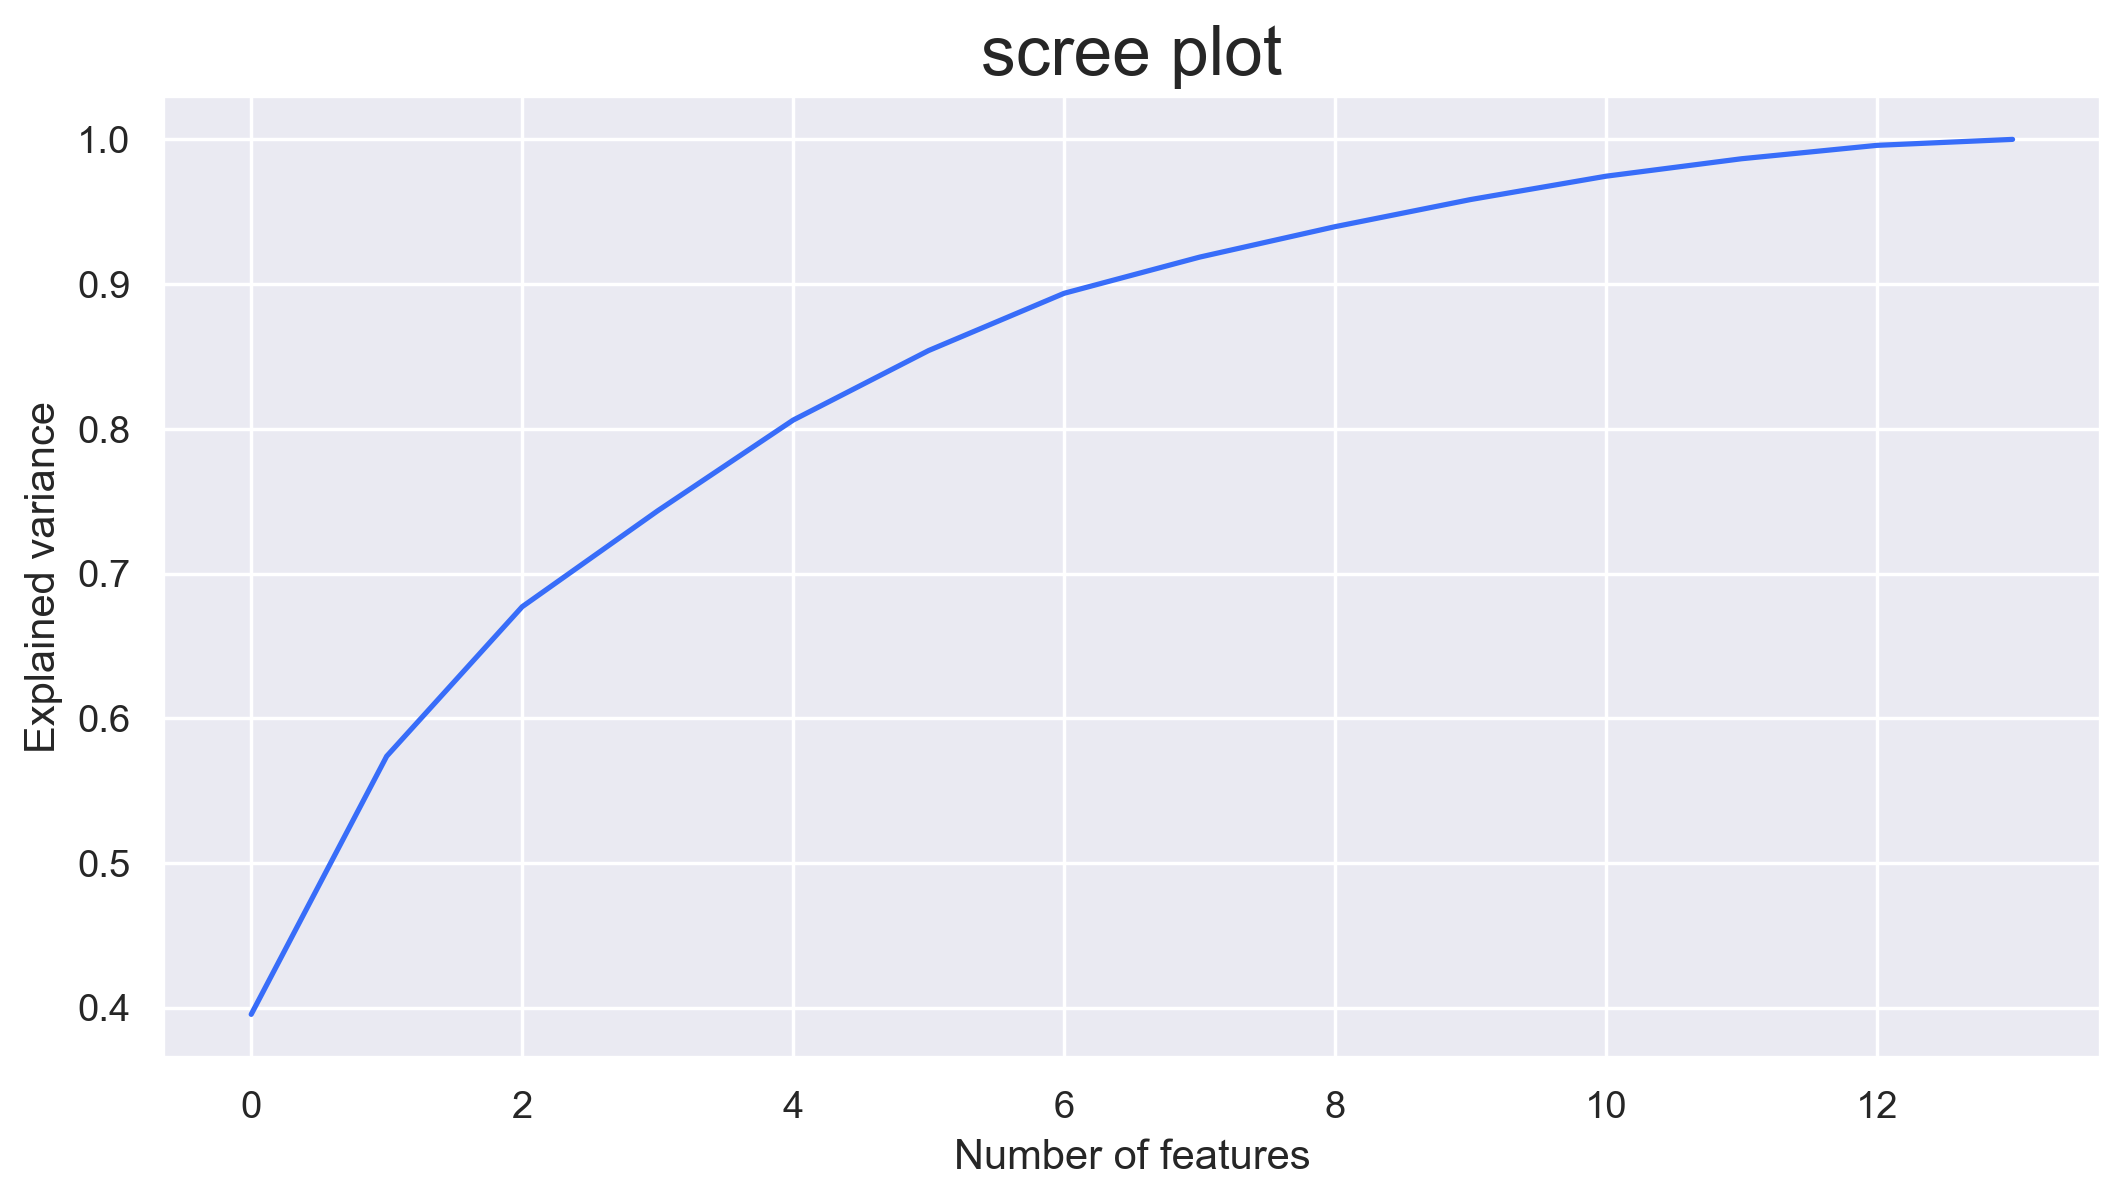

In [20]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of features')
plt.ylabel('Explained variance')
plt.title('scree plot', size = 20)

In [22]:
pca = PCA(n_components=3)
pcs = pca.fit_transform(x)
pcs = pd.DataFrame(pcs,columns=['pc1','pc2','pc3'])
pcs

,pc1,pc2,pc3
0,-3.522934,-1.453098,-0.164795
1,-2.528858,0.330019,-2.026707
2,-2.785029,-1.036936,0.983238
3,-3.922588,-2.768210,-0.174968
4,-1.407511,-0.867773,2.025829
...,...,...,...
173,3.627996,-2.206617,-0.343668
174,2.942729,-1.752263,0.207480
175,3.027272,-2.756040,-0.940803
176,2.755222,-2.293784,-0.550474
